In [49]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re

In [2]:
x_train_df = pd.read_csv('data_reviews/x_train.csv')
y_train_df = pd.read_csv('data_reviews/y_train.csv')

tr_text_list = x_train_df['text'].values.tolist()

In [51]:
# Special characters and punctuation
df = x_train_df.copy()
punc_list = list("?:!.,;()")
df["text_1"] = df["text"].str.replace("\n", " ")
df["text_1"] = df["text_1"].str.replace('"', " ")
df["text_1"] = df["text_1"].str.replace("'s", " ")
for punc in punc_list:
    df["text_1"] = df["text_1"].str.replace(punc, " ")
    
#lowering cases
df["text_1"] = df["text_1"].str.lower()
df.head()

<ipython-input-51-73e324753e51>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["text_1"] = df["text_1"].str.replace(punc, " ")


,website_name,text,text_1
0,amazon,Oh and I forgot to also mention the weird colo...,oh and i forgot to also mention the weird colo...
1,amazon,THAT one didn't work either.,that one didn't work either
2,amazon,Waste of 13 bucks.,waste of 13 bucks
3,amazon,"Product is useless, since it does not have eno...",product is useless since it does not have eno...
4,amazon,None of the three sizes they sent with the hea...,none of the three sizes they sent with the hea...


In [52]:
#stemming and lemmatization
nltk.download('punkt')
nltk.download('wordnet')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

wordnet_lemmatizer = WordNetLemmatizer()
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['text_1']
    text_words = text.split(" ")

    if row < 10:
        print(text)

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    if row < 10:
        print(lemmatized_text)
        print("")
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

df['text_2'] = lemmatized_text_list
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/irenechang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/irenechang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


oh and i forgot to also mention the weird color effect it has on your phone 
oh and i forgot to also mention the weird color effect it have on your phone 

that one didn't work either 
that one didn't work either 

waste of 13 bucks 
waste of 13 buck 

product is useless  since it does not have enough charging current to charge the 2 cellphones i was planning to use it with 
product be useless  since it do not have enough charge current to charge the 2 cellphone i be planning to use it with 

none of the three sizes they sent with the headset would stay in my ears 
none of the three size they sent with the headset would stay in my ear 

worst customer service 
bad customer service 

the ngage is still lacking in earbuds 
the ngage be still lack in earbuds 

it always cuts out and makes a beep beep beep sound then says signal failed 
it always cut out and make a beep beep beep sound then say signal fail 

the only very disappointing thing was there was no speakerphone    
the only very 

,website_name,text,text_1,text_2
0,amazon,Oh and I forgot to also mention the weird colo...,oh and i forgot to also mention the weird colo...,oh and i forgot to also mention the weird colo...
1,amazon,THAT one didn't work either.,that one didn't work either,that one didn't work either
2,amazon,Waste of 13 bucks.,waste of 13 bucks,waste of 13 buck
3,amazon,"Product is useless, since it does not have eno...",product is useless since it does not have eno...,product be useless since it do not have enoug...
4,amazon,None of the three sizes they sent with the hea...,none of the three sizes they sent with the hea...,none of the three size they sent with the head...


In [79]:
#stopwords
# nltk.download('stopwords')
# stop_words = list(stopwords.words('english'))
# re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
# def removeStopWords(sentence):
#     # removing stop words
#     global re_stop_words
#     return re_stop_words.sub(" ", sentence)
# df['text_3'] = df['text_2'].apply(removeStopWords)
# for stop_word in stop_words:
#     regex_stopword = r"\b" + stop_word + r"\b"
#     df['text_3'] = df['text_2'].str.replace(regex_stopword, '')

#remove numbers
pattern = r'[0-9]'
remove_number = []
for text in df["text_2"].tolist():
    remove_number.append(re.sub(pattern, '', text))
    
df["text_3"] = remove_number
df

,website_name,text,text_1,text_2,text_3
0,amazon,Oh and I forgot to also mention the weird colo...,oh and i forgot to also mention the weird colo...,oh and i forgot to also mention the weird colo...,oh and i forgot to also mention the weird colo...
1,amazon,THAT one didn't work either.,that one didn't work either,that one didn't work either,that one didn't work either
2,amazon,Waste of 13 bucks.,waste of 13 bucks,waste of 13 buck,waste of buck
3,amazon,"Product is useless, since it does not have eno...",product is useless since it does not have eno...,product be useless since it do not have enoug...,product be useless since it do not have enoug...
4,amazon,None of the three sizes they sent with the hea...,none of the three sizes they sent with the hea...,none of the three size they sent with the head...,none of the three size they sent with the head...
...,...,...,...,...,...
2395,yelp,The sweet potato fries were very good and seas...,the sweet potato fries were very good and seas...,the sweet potato fry be very good and season w...,the sweet potato fry be very good and season w...
2396,yelp,I could eat their bruschetta all day it is dev...,i could eat their bruschetta all day it is dev...,i could eat their bruschetta all day it be dev...,i could eat their bruschetta all day it be dev...
2397,yelp,Ambience is perfect.,ambience is perfect,ambience be perfect,ambience be perfect
2398,yelp,We ordered the duck rare and it was pink and t...,we ordered the duck rare and it was pink and t...,we order the duck rare and it be pink and tend...,we order the duck rare and it be pink and tend...


In [80]:
list_columns = ["website_name", "text_3"]
df_clean = df.copy()
df_clean = df_clean[list_columns]
df_clean = df_clean.rename(columns={'text_3': 'text'})
df_clean.head()

,website_name,text
0,amazon,oh and i forgot to also mention the weird colo...
1,amazon,that one didn't work either
2,amazon,waste of buck
3,amazon,product be useless since it do not have enoug...
4,amazon,none of the three size they sent with the head...


In [81]:
from spellchecker import SpellChecker
spell = SpellChecker(distance=4)
list_words = []
for index, txt in enumerate(df_clean.text):
    words = spell.split_words(txt)
    list_words = [spell.correction(word) for word in words]
    df_clean.loc[index, 'text'] = ' '.join(list_words)

In [86]:
stopwords

<WordListCorpusReader in '/Users/irenechang/nltk_data/corpora/stopwords'>

In [82]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df_clean['text'].values.tolist())
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
pd.DataFrame(denselist, columns=feature_names)

,abandon,abhor,ability,able,abound,about,above,abroad,absolute,absolutely,...,youtube,yucky,yukon,yum,yummy,yun,za,zero,zillion,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
all_important_words = []
score_list = []
for index, item in enumerate(denselist):
    scores = {feature: tfidf for feature, tfidf in zip(feature_names, item)}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words: 
        if score > 0.3:
            all_important_words.append((word, score))

# all_important_words

<AxesSubplot:ylabel='Count'>

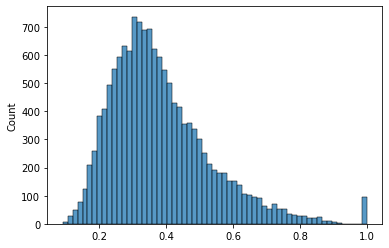

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.histplot(score_list)

In [84]:
# len(set(all_important_words))
top_words = pd.DataFrame(denselist, columns=feature_names)
# top_words[all]
important_words = [x for x,_ in all_important_words]
trainset = top_words[list(set(important_words))]

x_train, x_test, y_train, y_test = train_test_split(trainset, y_train_df['is_positive_sentiment'], test_size=0.33, random_state = 0)

In [78]:
trainset

,exchange,imagination,goat,sensibility,ri,yum,regardless,recognition,eat,expert,...,render,yet,unhappy,pneumatic,concrete,childhood,san,post,articulate,behind
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369831,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
trainset.to_csv('important_words.csv', index=False)

## LR - TDIDF Unigrams (Win)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

base_lr = LogisticRegression()
base_lr.fit(x_train, y_train)
print(base_lr.score(x_train, y_train))
print(base_lr.score(x_test, y_test))

0.9440298507462687
0.773989898989899


In [394]:
from sklearn.linear_model import LogisticRegressionCV
import warnings
warnings.filterwarnings("ignore")
base_lrcv = LogisticRegressionCV(cv=4)
base_lrcv.fit(x_train, y_train)
print(base_lrcv.score(x_train, y_train))
print(base_lrcv.score(x_test, y_test))

0.9676616915422885
0.7878787878787878


In [62]:
from sklearn.linear_model import LogisticRegressionCV
import warnings
warnings.filterwarnings("ignore")
base_lrcv = LogisticRegressionCV(cv=4)
base_lrcv.fit(x_train, y_train)
print(base_lrcv.score(x_train, y_train))
print(base_lrcv.score(x_test, y_test))

0.9670398009950248
0.7828282828282829


In [60]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {"C":np.logspace(-3,3,10), "max_iter":[50, 150, 250, 350, 450, 500]}
tune_lr = LogisticRegression()
grid_search = GridSearchCV(tune_lr, param_grid = param_grid, scoring='accuracy',cv=3,verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'max_iter': [50, 150, 250, 350, 450, 500]},
             scoring='accuracy', verbose=1)

In [61]:
# print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
# print(grid_search.best_params_)

Best parameter (CV score=0.785):
{'C': 2.154434690031882, 'max_iter': 50}


In [29]:
print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
print(grid_search.best_params_)

Best parameter (CV score=0.799):
{'C': 2.154434690031882, 'max_iter': 50}


In [74]:
test_set = pd.read_csv('test_data.csv')

In [30]:
prediction = grid_search.predict_proba(test_set)[:,1]
np.savetxt('yproba1_test.txt', prediction)

In [63]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline
def plot_accuracy_and_logLoss(range, train_acc, test_acc, train_logLoss, test_logLoss):
    fig, ax = plt.subplots(1, 2, figsize=(8, 6))
    ax[0].plot(range, train_acc, color="red", label="train")
    ax[0].plot(range, test_acc, color="blue", label="test")
    ax[1].plot(range, train_logLoss, color="red", label="train")
    ax[1].plot(range, test_logLoss, color="blue", label="test")
    plt.legend()
    plt.show()

def examine_Cs(data_train, label_train, data_test, label_test):
    train_acc = []
    test_acc = []
    train_logLoss = []
    test_logLoss = []
    for c in np.logspace(-3,3,10):
        lr = LogisticRegressionCV(Cs = [c for i in range(4)], cv=4)
        lr.fit(data_train, label_train)
        train_acc.append(lr.score(data_train, label_train))
        test_acc.append(lr.score(data_test, label_test))
        train_logLoss.append(log_loss(label_train, lr.predict(data_train)))
        test_logLoss.append(log_loss(label_test, lr.predict(data_test)))
    plot_accuracy_and_logLoss(np.logspace(-3,3,10), train_acc, test_acc, train_logLoss, test_logLoss)


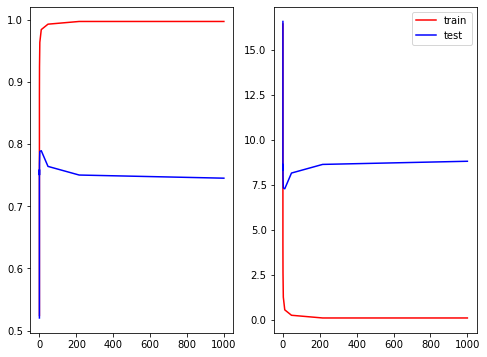

In [167]:
examine_Cs(x_train, y_train, x_test, y_test)

## SVM - TFIDF Unigrams

In [109]:
from sklearn.svm import SVC

base_svm = SVC()
base_svm.fit(x_train, y_train)
print(base_svm.score(x_train, y_train))
print(base_svm.score(x_test, y_test))

0.9906716417910447
0.7815656565656566


In [65]:
from sklearn.svm import SVC

base_svm = SVC()
base_svm.fit(x_train, y_train)
print(base_svm.score(x_train, y_train))
print(base_svm.score(x_test, y_test))

0.9900497512437811
0.7828282828282829


In [71]:
from sklearn.model_selection import RandomizedSearchCV
gamma = [.001, .01, .1, 1, 10, 100]
degree = [1, 2, 3, 4]
kernel = ['linear', 'rbf', 'poly']

svc_grid = {'kernel': kernel,
              'gamma': gamma,
              'degree': degree
             }

tune_svc = SVC(random_state = 0, probability=True)
svc_search = RandomizedSearchCV(tune_svc, param_distributions = svc_grid, scoring='accuracy',cv=3,verbose=1, n_jobs=-1, n_iter=50)
svc_search.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=SVC(probability=True, random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'degree': [1, 2, 3, 4],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy', verbose=1)

In [72]:
print('Best parameters found:\n', svc_search.best_params_)
print("Train accuracy: %.4f" % svc_search.score(x_train, y_train))
print(" Test accuracy: %.4f" % svc_search.score(x_test, y_test))

Best parameters found:
 {'kernel': 'rbf', 'gamma': 1, 'degree': 3}
Train accuracy: 0.9900
 Test accuracy: 0.7828


In [75]:
prediction = svc_search.predict_proba(test_set)[:,1]
np.savetxt('yproba1_test.txt', prediction)

ValueError: X.shape[1] = 3517 should be equal to 3272, the number of features at training time

In [193]:
# print('Best parameters found:\n', svc_search.best_params_)
# print("Train accuracy: %.4f" % svc_search.score(x_train, y_train))
# print(" Test accuracy: %.4f" % svc_search.score(x_test, y_test))

Best parameters found:
 {'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Train accuracy: 0.9907
 Test accuracy: 0.7828


## DecisionTree - TDIDF Unigrams

In [146]:
from sklearn.tree import DecisionTreeClassifier

base_dt = DecisionTreeClassifier(random_state = 0)
base_dt.fit(x_train, y_train)
print(base_dt.score(x_train, y_train))
print(base_dt.score(x_test, y_test))

0.9987562189054726
0.7297979797979798


## Random Forest - TDIDF Unigrams

In [145]:
from sklearn.ensemble import RandomForestClassifier
base_rfc = RandomForestClassifier(random_state = 0)
base_rfc.fit(x_train, y_train)
print(base_rfc.score(x_train, y_train))
print(base_rfc.score(x_test, y_test))

0.9987562189054726
0.7777777777777778


In [87]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
min_samples_split = [2, 5, 10]
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rfc_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

tune_rfc = RandomForestClassifier(random_state = 0)
rfc_search = RandomizedSearchCV(tune_rfc, param_distribution = rfc_grid, scoring='accuracy',cv=3,verbose=1, n_jobs=-1)
rfc_search.fit(x_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [195]:
print('Best parameters found:\n', rfc_search.best_params_)
print("Train accuracy: %.4f" % rfc_search.score(x_train, y_train))
print(" Test accuracy: %.4f" % rfc_search.score(x_test, y_test))

Best parameters found:
 {'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 800}
Train accuracy: 0.9888
 Test accuracy: 0.7551


In [128]:
df_clean

,website_name,text
0,amazon,oh forget also mention weird color effect ...
1,amazon,one work either
2,amazon,waste buck
3,amazon,product useless since enough charge curr...
4,amazon,none three size send headset would stay ...
...,...,...
2395,yelp,sweet potato fry good season well
2396,yelp,could eat bruschetta day devine
2397,yelp,ambience perfect
2398,yelp,order duck rare pink tender inside n...


# Bigrams + Unigrams

In [137]:
# Parameter election
ngram_range = (1,2)
max_features = 300

tfidf = TfidfVectorizer(ngram_range=ngram_range,
                        norm='l2',
                        sublinear_tf=True)
                        
# features_train = tfidf.fit_transform(df_clean['text'].values.tolist()).toarray()
# labels_train = y_train_df['is_positive_sentiment']

vectorizer2 = TfidfVectorizer(ngram_range=ngram_range,
                        norm='l2',
                        sublinear_tf=True)
vectors2 = vectorizer2.fit_transform(df_clean['text'].values.tolist())
feature_names2 = vectorizer2.get_feature_names()
dense2 = vectors2.todense()
denselist2 = dense2.tolist()

all_important_words2 = []
for index, item in enumerate(denselist2):
    scores2 = {feature: tfidf for feature, tfidf in zip(feature_names2, item)}
    sorted_words2 = sorted(scores2.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words2: 
        if score > 0.3:
            all_important_words2.append((word, score))

top_words2 = pd.DataFrame(denselist2, columns=feature_names2)
# top_words[all]
important_words2 = [x for x,_ in all_important_words2]
trainset2 = top_words2[list(set(important_words2))]

x_train2, x_test2, y_train2, y_test2 = train_test_split(trainset2, y_train_df['is_positive_sentiment'], test_size=0.33, random_state = 0)

## LR - TDIDF Bigrams

In [139]:
base_lr2 = LogisticRegression()
base_lr2.fit(x_train2, y_train2)
print(base_lr2.score(x_train2, y_train2))
print(base_lr2.score(x_test2, y_test2))

0.957089552238806
0.7676767676767676


In [168]:
param_grid2 = {"C":np.logspace(-3,3,10), "max_iter":[50, 150, 250, 350, 450, 500]}
tune_lr2 = LogisticRegression()
grid_search2 = GridSearchCV(tune_lr2, param_grid = param_grid2, scoring='accuracy',cv=3,verbose=1, n_jobs=-1)
grid_search2.fit(x_train2, y_train2)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'max_iter': [50, 150, 250, 350, 450, 500]},
             scoring='accuracy', verbose=1)

In [169]:
print("Best parameter (CV score=%0.3f):" % grid_search2.best_score_)
print(grid_search2.best_params_)

Best parameter (CV score=0.800):
{'C': 2.154434690031882, 'max_iter': 50}


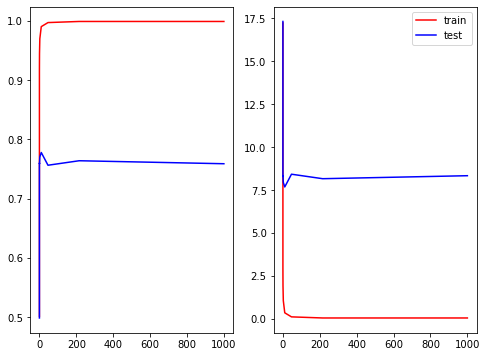

In [170]:
examine_Cs(x_train2, y_train2, x_test2, y_test2)

## SVM - TDIDF Bigrams

In [140]:
base_svm2 = SVC()
base_svm2.fit(x_train2, y_train2)
print(base_svm2.score(x_train2, y_train2))
print(base_svm2.score(x_test2, y_test2))

0.9850746268656716
0.7664141414141414


In [143]:
base_dt2 = DecisionTreeClassifier(random_state = 0)
base_dt2.fit(x_train2, y_train2)
print(base_dt2.score(x_train2, y_train2))
print(base_dt2.score(x_test2, y_test2))

0.9987562189054726
0.7335858585858586


In [144]:
base_rfc2 = RandomForestClassifier(random_state = 0)
base_rfc2.fit(x_train2, y_train2)
print(base_rfc2.score(x_train2, y_train2))
print(base_rfc2.score(x_test2, y_test2))

0.9987562189054726
0.7702020202020202


# Test

## data

In [295]:
neg = df_clean[y_train_df.is_positive_sentiment == 0]
pos = df_clean[y_train_df.is_positive_sentiment == 1]
# pos.reset_index(drop=True, inplace=True)
# neg.reset_index(drop=True, inplace=True)

In [298]:
tdidf_pos = TfidfVectorizer()
Xpos = tdidf_pos.fit_transform(pos.text.values.tolist())
pos_feature_names = tdidf_pos.get_feature_names()
pos_dense = Xpos.todense()
denselist_pos = pos_dense.tolist()

tfidf_neg = TfidfVectorizer()
Xneg = tfidf_neg.fit_transform(neg.text.values.tolist())
neg_feature_names = tfidf_neg.get_feature_names()
neg_dense = Xneg.todense()
denselist_neg = neg_dense.tolist()

In [356]:
pos_words = []
neg_words = []
for index, item in enumerate(denselist_pos):
    scores_pos = {feature: tfidf for feature, tfidf in zip(pos_feature_names, item)}
    sorted_words_pos = sorted(scores_pos.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words_pos: 
        if score > 0.3:
            pos_words.append((word, score))

for index, item in enumerate(denselist_neg):
    scores_neg = {feature: tfidf for feature, tfidf in zip(neg_feature_names, item)}
    sorted_words_neg = sorted(scores_neg.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words_neg: 
        if score > 0.3:
            neg_words.append((word, score))

In [357]:
important_pos = [x for x,_ in pos_words]
important_neg = [x for x,_ in neg_words]

pos_set = set(important_pos)
neg_set = set(important_neg)
poss = pos_set - neg_set
negs = neg_set - pos_set
all_set = poss.union(negs)

In [358]:
pos_df = pd.DataFrame(denselist_pos, columns=pos_feature_names)
neg_df = pd.DataFrame(denselist_neg, columns=neg_feature_names)

In [359]:
pos_df = pos_df[list(poss)]
neg_df = neg_df[list(negs)]
all_set = list(all_set)

In [360]:
zeros = np.zeros((len(x_train_df), len(all_set)))
dummies = pd.DataFrame(zeros, columns = all_set)
dummies.loc[neg.index, list(negs)] = neg_df
dummies.loc[pos.index, list(poss)] = pos_df
dummies.fillna(0, inplace=True)

In [343]:
dummies

,manual,trumbull,iam,perfectly,gooodd,gel,spotty,torture,girlfriend,alexander,...,hello,reversible,neighborhood,cinematography,fair,sooooo,surprise,portable,regrettably,simple
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## train

In [361]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(dummies, y_train_df['is_positive_sentiment'], test_size=0.33, random_state = 0)

In [362]:
network4 = MLPClassifier(max_iter=400, random_state=13)
network4.fit(x_train4, y_train4)
print("Train accuracy: %.4f" % network4.score(x_train4, y_train4))
print(" Test accuracy: %.4f" % network4.score(x_test4, y_test4))

Train accuracy: 0.7481
 Test accuracy: 0.6439


# CountVectorizer Unigrams

In [290]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer3 = CountVectorizer()
vectors3 = vectorizer3.fit_transform(df_clean['text'].values.tolist())
feature_names3 = vectorizer3.get_feature_names()
dense3 = vectors3.todense()
denselist3 = dense3.tolist()

all_important_words3 = []
for index, item in enumerate(denselist3):
    scores3 = {feature: tfidf for feature, tfidf in zip(feature_names3, item)}
    sorted_words3 = sorted(scores3.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words3: 
        if score > 0:
            all_important_words3.append((word, score))

top_words3 = pd.DataFrame(denselist3, columns=feature_names3)
# top_words[all]
important_words3 = [x for x,_ in all_important_words3]
trainset3 = top_words3[list(set(important_words3))]

x_train3, x_test3, y_train3, y_test3 = train_test_split(trainset3, y_train_df['is_positive_sentiment'], test_size=0.33, random_state = 0)

## LR - Count Unigrams

In [291]:
base_lr3 = LogisticRegression()
base_lr3.fit(x_train3, y_train3)
print(base_lr3.score(x_train3, y_train3))
print(base_lr3.score(x_test3, y_test3))

0.9639303482587065
0.7803030303030303


In [171]:
param_grid3 = {"C":np.logspace(-3,3,10), "max_iter":[50, 150, 250, 350, 450, 500]}
tune_lr3 = LogisticRegression()
grid_search3 = GridSearchCV(tune_lr3, param_grid = param_grid3, scoring='accuracy',cv=3,verbose=1, n_jobs=-1)
grid_search3.fit(x_train3, y_train3)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'max_iter': [50, 150, 250, 350, 450, 500]},
             scoring='accuracy', verbose=1)

In [172]:
print("Best parameter (CV score=%0.3f):" % grid_search3.best_score_)
print(grid_search3.best_params_)

Best parameter (CV score=0.775):
{'C': 0.46415888336127775, 'max_iter': 50}


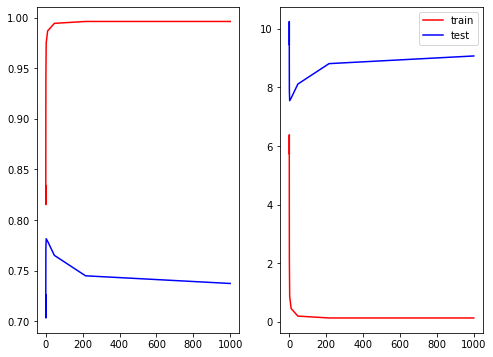

In [173]:
examine_Cs(x_train3, y_train3, x_test3, y_test3)

## SVM - Count Unigrams

In [292]:
base_svm3 = SVC()
base_svm3.fit(x_train3, y_train3)
print(base_svm3.score(x_train3, y_train3))
print(base_svm3.score(x_test3, y_test3))

0.9620646766169154
0.7550505050505051


In [293]:
base_dt3 = DecisionTreeClassifier(random_state = 0)
base_dt3.fit(x_train3, y_train3)
print(base_dt3.score(x_train3, y_train3))
print(base_dt3.score(x_test3, y_test3))

0.9987562189054726
0.6944444444444444


In [294]:
base_rfc3 = RandomForestClassifier(random_state = 0)
base_rfc3.fit(x_train3, y_train3)
print(base_rfc3.score(x_train3, y_train3))
print(base_rfc3.score(x_test3, y_test3))

0.9987562189054726
0.7689393939393939


# Neural Network

## 1

In [25]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(max_iter=400, random_state=13, early_stopping=True)
network.fit(x_train, y_train)
print("Train accuracy: %.4f" % network.score(x_train, y_train))
print(" Test accuracy: %.4f" % network.score(x_test, y_test))

Train accuracy: 0.9484
 Test accuracy: 0.7689


In [26]:
try_params = {
    'activation': ['logistic', 'relu'],
    'hidden_layer_sizes': [(50,), (100,), (128, 64, 32, 8)],
    'alpha': 10.0 ** -np.arange(-2, 2)
}

gscv = GridSearchCV(network, try_params, cv=3, n_jobs=-1)
gscv.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(early_stopping=True, max_iter=400,
                                     random_state=13),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': array([100. ,  10. ,   1. ,   0.1]),
                         'hidden_layer_sizes': [(50,), (100,),
                                                (128, 64, 32, 8)]})

In [27]:
print('Best parameters found:\n', gscv.best_params_)
print("Train accuracy: %.4f" % gscv.score(x_train, y_train))
print(" Test accuracy: %.4f" % gscv.score(x_test, y_test))

Best parameters found:
 {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (50,)}
Train accuracy: 0.9216
 Test accuracy: 0.7652


## 2.

In [181]:
network2 = MLPClassifier(max_iter=400, random_state=13, early_stopping=True)
network2.fit(x_train2, y_train2)
print("Train accuracy: %.4f" % network2.score(x_train2, y_train2))
print(" Test accuracy: %.4f" % network2.score(x_test2, y_test2))

Train accuracy: 0.9521
 Test accuracy: 0.7614


In [182]:
try_params2 = {
    'activation': ['logistic', 'relu'],
    'hidden_layer_sizes': [(50,), (100,), (64, 32, 8)],
    'alpha': 10.0 ** -np.arange(-2, 2)
}

gscv2 = GridSearchCV(network2, try_params2, cv=3, n_jobs=-1)
gscv2.fit(x_train2, y_train2)

GridSearchCV(cv=3,
             estimator=MLPClassifier(early_stopping=True, max_iter=400,
                                     random_state=13),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': array([100. ,  10. ,   1. ,   0.1]),
                         'hidden_layer_sizes': [(50,), (100,), (64, 32, 8)]})

In [183]:
print('Best parameters found:\n', gscv2.best_params_)
print("Train accuracy: %.4f" % gscv2.score(x_train2, y_train2))
print(" Test accuracy: %.4f" % gscv2.score(x_test2, y_test2))

Best parameters found:
 {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (100,)}
Train accuracy: 0.9328
 Test accuracy: 0.7652


## 3.

In [185]:
network3 = MLPClassifier(early_stopping=True, max_iter=400, random_state=13)
network3.fit(x_train3, y_train3)
print("Train accuracy: %.4f" % network3.score(x_train3, y_train3))
print(" Test accuracy: %.4f" % network3.score(x_test3, y_test3))

Train accuracy: 0.9583
 Test accuracy: 0.7715


In [186]:
try_params3 = {
    'activation': ['logistic', 'relu'],
    'hidden_layer_sizes': [(50,), (100,), (64, 32, 8), (128, 64)],
    'alpha': 10.0 ** -np.arange(-2, 2)
}

gscv3 = GridSearchCV(network3, try_params3, cv=3, n_jobs=-1)
gscv3.fit(x_train3, y_train3)

GridSearchCV(cv=3,
             estimator=MLPClassifier(early_stopping=True, max_iter=400,
                                     random_state=13),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': array([100. ,  10. ,   1. ,   0.1]),
                         'hidden_layer_sizes': [(50,), (100,), (64, 32, 8),
                                                (128, 64)]})

In [188]:
print('Best parameters found:\n', gscv3.best_params_)
print("Train accuracy: %.4f" % gscv3.score(x_train3, y_train3))
print(" Test accuracy: %.4f" % gscv3.score(x_test3, y_test3))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100,)}
Train accuracy: 0.9527
 Test accuracy: 0.7778
